In [1]:
import os
print(os.listdir("../input"))

['training_set', 'test_set']


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from matplotlib import pyplot as plt
#sets matplotlib inline and display graphs below the carasponding cell
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid', color_codes=True)
# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [3]:
train_path = '../input/training_set/training_set'
test_path = '../input/test_set/test_set'

In [4]:
from keras.preprocessing.image import ImageDataGenerator
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['cats','dogs'],  batch_size=50)
test_batches = ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224), classes=['cats','dogs'],batch_size=50)

Using TensorFlow backend.


Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [5]:
#plot image with labels
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if(ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
            f = plt.figure(figsize=figsize)
            cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
            for i in range(len(ims)):
                sp = f.add_subplot(rows, cols, i+1)
                sp.axis('Off')
                if titles is not None:
                    sp.set_title(titles[i], fontsize=16)
                    plt.imshow(ims[i], interpolation= None if interp else 'none')

In [6]:
imgs, labels = next(train_batches)

In [7]:
 plots(imgs, titles=labels)

# Build a Train Model

In [8]:
#preprocessing
from keras.preprocessing.image import ImageDataGenerator

#dl libraries
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

#specify for cnn
from keras.layers import Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization


In [9]:
model = Sequential([
    Conv2D(32,(3,3), activation = 'relu', input_shape=(224,224,3)),
    Flatten(),
    Dense(2, activation='softmax')
])
#224 size, 3 = rgb color scale
#classifier = sequential
#32,3,3--> 32 filter with 3*3 for each filter.
#start with 32 filters, and then create more layers with 64,128,256.
#224,224,3---> 3 color channel(RGB), 224*224 pixel. 
# but when use cpu, 3,64 use, due to computational limit 
# flatten: creating a long vector. 

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
flatten_1 (Flatten)          (None, 1577088)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 3154178   
Total params: 3,155,074
Trainable params: 3,155,074
Non-trainable params: 0
_________________________________________________________________


In [11]:
#optimization
model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# loss =''how to find loss

In [12]:
model.fit_generator(train_batches, steps_per_epoch=50, #(80*100)
                   validation_data=test_batches, validation_steps=50, epochs=20, verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
 - 122s - loss: 8.1839 - acc: 0.4916 - val_loss: 8.1014 - val_acc: 0.4974
Epoch 2/20
 - 121s - loss: 7.9752 - acc: 0.5052 - val_loss: 7.9189 - val_acc: 0.5087
Epoch 3/20
 - 122s - loss: 8.1880 - acc: 0.4920 - val_loss: 8.2578 - val_acc: 0.4877
Epoch 4/20
 - 118s - loss: 7.9447 - acc: 0.5071 - val_loss: 8.0036 - val_acc: 0.5034
Epoch 5/20
 - 120s - loss: 7.9946 - acc: 0.5040 - val_loss: 8.0920 - val_acc: 0.4980
Epoch 6/20
 - 120s - loss: 8.1106 - acc: 0.4968 - val_loss: 7.9711 - val_acc: 0.5055
Epoch 7/20
 - 118s - loss: 8.0004 - acc: 0.5036 - val_loss: 8.1210 - val_acc: 0.4962
Epoch 8/20
 - 120s - loss: 7.9881 - acc: 0.5044 - val_loss: 7.9450 - val_acc: 0.5071
Epoch 9/20
 - 120s - loss: 8.1944 - acc: 0.4916 - val_loss: 8.1536 - val_acc: 0.4941
Epoch 10/20
 - 118s - loss: 8.0714 - acc: 0.4992 - val_loss: 8.0393 - val_acc: 0.5012
Epoch 11/20
 - 121s - loss: 8.1751 - acc: 0.4928 - val_loss: 8.2252 - val_acc: 0.4897
Epoch 12/20
 - 

# Prediction

In [13]:
from sklearn.metrics import confusion_matrix
import itertools

In [14]:
test_imgs, test_labels = next(test_batches)


In [15]:
plots(test_imgs, titles=test_labels)

In [16]:
test_labels = test_labels[:,0]
test_labels

array([1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1.,
       1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0.],
      dtype=float32)

In [17]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)
  # 10 sample of test images then steps=1

In [18]:
predictions

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [19]:
# how mapping done?
test_batches.class_indices

{'cats': 0, 'dogs': 1}

# Confusion matrix

In [20]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix


In [21]:
cm = confusion_matrix(test_labels, predictions[:,0])# only gives first array

In [22]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap = plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.Sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')
        
        print(cm)
        
        thresh = cm.max() /2.
        for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i,j],
                    horizontalalignment='center',
                    color = 'white' if cm[i,j] > thresh else 'black')
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Prediction label')

Confusion matrix, without normalization
[[ 0 20]
 [ 0 30]]


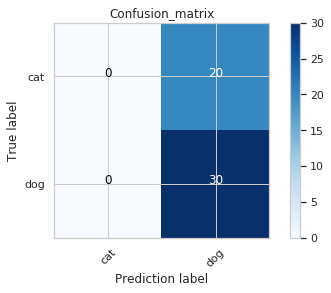

In [23]:
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm, cm_plot_labels, title= 'Confusion_matrix')

# VGG16 Model

In [24]:
import keras
from keras.applications.vgg16 import VGG16, preprocess_input


In [25]:
vgg16_model = keras.applications.VGG16()


Exception: URL fetch failure on https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_tf_dim_ordering_tf_kernels.h5: None -- [Errno -3] Temporary failure in name resolution

In [26]:
vgg16_model.summary()

NameError: name 'vgg16_model' is not defined

In [27]:
type(vgg16_model)

NameError: name 'vgg16_model' is not defined

In [28]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:   #exclude last output layer
    model.add(layer)

NameError: name 'vgg16_model' is not defined

In [29]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling build() or calling fit() with some data. Or specify input_shape or batch_input_shape in the first layer for automatic build. 

In [30]:
model.layers.pop(0)   # last layer is gone : because in theie output is 1000 we requred only 2

IndexError: pop from empty list

In [31]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling build() or calling fit() with some data. Or specify input_shape or batch_input_shape in the first layer for automatic build. 

In [32]:
for layer in model.layers:
    layer.trainable = False

In [33]:
model.add(Dense(2, activation= 'softmax'))

In [34]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling build() or calling fit() with some data. Or specify input_shape or batch_input_shape in the first layer for automatic build. 

# Train the Fine-Tuned VGG-16 Model

In [35]:
model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
model.fit_generator(train_batches, steps_per_epoch=4,
                   validation_data = valid_batches, validation_steps=4, epochs=5, verbose=2)

NameError: name 'valid_batches' is not defined

 # Visualising Accuracy and loss w.r.t. the Epochs

In [37]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [38]:
test_labels = test_labels[:,0]
test_labels

array([1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.],
      dtype=float32)

In [39]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

AttributeError: 'Sequential' object has no attribute '_feed_inputs'

In [40]:
cm = confusion_matrix(test_labels, np.round(predictions[:,0]))

In [41]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap = plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.Sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')
        
        print(cm)
        
        thresh = cm.max() /2.
        for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i,j],
                    horizontalalignment='center',
                    color = 'white' if cm[i,j] > thresh else 'black')
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Prediction label')

Confusion matrix, without normalization
[[ 0 34]
 [ 0 16]]


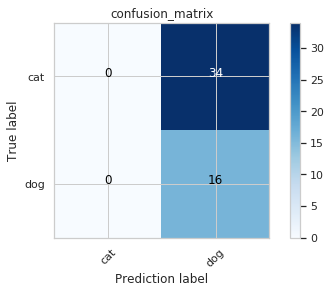

In [42]:
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm, cm_plot_labels, title='confusion_matrix')